In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df = pd.read_csv("heart_disease_data_with_features.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,...,2.378378,0.876449,-0.526822,235.847222,-132,-0.816667,11880,1713.360,4950,18.884120
299,68,1,4,144,193,1,0,141,0,3.4,...,1.331034,0.940767,2.303281,260.024691,-52,8.767901,13124,2053.524,9792,12.400411
300,57,1,4,130,131,0,0,115,1,1.2,...,1.000000,0.973537,0.294821,247.424000,-16,1.165600,7467,1008.205,7410,13.412512
301,57,0,2,130,236,0,2,174,0,0.0,...,1.801527,0.944537,-0.800702,247.424000,-62,-3.634400,13452,2566.848,7410,14.982224


In [3]:
#display the first five rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    int64  
 1   sex                    303 non-null    int64  
 2   cp                     303 non-null    int64  
 3   trestbps               303 non-null    int64  
 4   chol                   303 non-null    int64  
 5   fbs                    303 non-null    int64  
 6   restecg                303 non-null    int64  
 7   thalach                303 non-null    int64  
 8   exang                  303 non-null    int64  
 9   oldpeak                303 non-null    float64
 10  slope                  303 non-null    int64  
 11  ca                     299 non-null    float64
 12  thal                   301 non-null    float64
 13  num                    303 non-null    int64  
 14  age_group              302 non-null    object 
 15  choles

In [5]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak  ...  \
count  303.000000  303.000000  303.000000  303.000000  ...   
mean     0.990099  149.607261    0.326733    1.039604  ...   
std      0.994971   22.875003    0.469794    1.161075  ...   
min      0.000000   71

In [6]:
#handle missing values
df = df.fillna(df.ffill())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,...,2.378378,0.876449,-0.526822,235.847222,-132,-0.816667,11880,1713.360,4950,18.884120
299,68,1,4,144,193,1,0,141,0,3.4,...,1.331034,0.940767,2.303281,260.024691,-52,8.767901,13124,2053.524,9792,12.400411
300,57,1,4,130,131,0,0,115,1,1.2,...,1.000000,0.973537,0.294821,247.424000,-16,1.165600,7467,1008.205,7410,13.412512
301,57,0,2,130,236,0,2,174,0,0.0,...,1.801527,0.944537,-0.800702,247.424000,-62,-3.634400,13452,2566.848,7410,14.982224


In [7]:
df = df.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,...,2.378378,0.876449,-0.526822,235.847222,-132,-0.816667,11880,1713.360,4950,18.884120
299,68,1,4,144,193,1,0,141,0,3.4,...,1.331034,0.940767,2.303281,260.024691,-52,8.767901,13124,2053.524,9792,12.400411
300,57,1,4,130,131,0,0,115,1,1.2,...,1.000000,0.973537,0.294821,247.424000,-16,1.165600,7467,1008.205,7410,13.412512
301,57,0,2,130,236,0,2,174,0,0.0,...,1.801527,0.944537,-0.800702,247.424000,-62,-3.634400,13452,2566.848,7410,14.982224


In [8]:
# verify data cleaning 
print(df.isnull().sum()) #check for any remaining missing values
print(df.duplicated().sum()) #check for any remaining duplicates

age                      0
sex                      0
cp                       0
trestbps                 0
chol                     0
fbs                      0
restecg                  0
thalach                  0
exang                    0
oldpeak                  0
slope                    0
ca                       0
thal                     0
num                      0
age_group                0
cholesterol_level        0
bp_level                 0
risk_score               0
symptom_severity         0
log_chol                 0
log_trestbps             0
age_squared              0
chol_squared             0
age_thalach_ratio        0
risk_factor              0
missing_values           0
chol_trestbps_ratio      0
log_thalach_chol         0
symptom_zscore           0
avg_chol_by_age_group    0
thalach_chol_diff        0
symptom_severity_diff    0
age_chol_effect          0
thalach_risk_effect      0
age_trestbps_effect      0
chol_risk_ratio          0
dtype: int64
0


In [9]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

Non-numeric columns: Index(['age_group', 'cholesterol_level', 'bp_level'], dtype='object')


In [10]:
# calculate basic statistics for age
mean_value = df['age'].mean()
median_value = df['age'].median()
mode_value = df['age'].mode()[0]

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

Mean: 54.43894389438944
Median: 56.0
Mode: 58


In [11]:
# calculate basic statistics for trestbps
mean_value = df['trestbps'].mean()
median_value = df['trestbps'].median()
mode_value = df['trestbps'].mode()[0]

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

Mean: 131.68976897689768
Median: 130.0
Mode: 120


In [12]:
# calculate basic statistics for chol
mean_value = df['chol'].mean()
median_value = df['chol'].median()
mode_value = df['chol'].mode()[0]

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

Mean: 246.69306930693068
Median: 241.0
Mode: 197


In [13]:
# calculate basic statistics for risk_score
mean_value = df['risk_score'].mean()
median_value = df['risk_score'].median()
mode_value = df['risk_score'].mode()[0]

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

Mean: 14.844072607260726
Median: 14.392
Mode: 8.32


In [14]:
# Analyze the data
numeric_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,3.030000e+02,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,...,1.884136,0.912094,-2.345026e-17,246.836383,-97.085809,-0.011995,13527.174917,2201.934545,7214.231023,15.909003
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,...,0.442007,0.044908,1.000000e+00,10.476640,56.676664,4.256873,4027.315929,648.585510,1742.066108,2.400325
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.834437,0.781516,-8.007024e-01,219.785714,-404.000000,-4.832099,5916.000000,886.920000,3666.000000,11.340087
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,...,1.565201,0.883965,-8.007024e-01,235.847222,-130.500000,-3.032099,10670.000000,1786.326000,5880.000000,14.129499
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,1.848921,0.915096,-3.898811e-01,247.424000,-89.000000,-1.832099,13053.000000,2149.950000,7140.000000,15.448892
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,...,2.143188,0.943574,4.545850e-01,260.024691,-57.500000,1.175617,15854.000000,2519.882000,8387.500000,17.458459
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,...,4.862069,1.064999,4.859503e+00,260.024691,47.000000,19.967901,37788.000000,6230.080000,12240.000000,24.829601


In [15]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                            age       sex        cp  trestbps      chol  \
age                    1.000000 -0.097542  0.104139  0.284946  0.208950   
sex                   -0.097542  1.000000  0.010084 -0.064456 -0.199915   
cp                     0.104139  0.010084  1.000000 -0.036077  0.072319   
trestbps               0.284946 -0.064456 -0.036077  1.000000  0.130120   
chol                   0.208950 -0.199915  0.072319  0.130120  1.000000   
fbs                    0.118530  0.047862 -0.039975  0.175340  0.009841   
restecg                0.148868  0.021647  0.067505  0.146560  0.171043   
thalach               -0.393806 -0.048663 -0.334422 -0.045351 -0.003432   
exang                  0.091661  0.146201  0.384060  0.064762  0.061310   
oldpeak                0.203805  0.102173  0.202277  0.189171  0.046564   
slope                  0.161770  0.037533  0.152050  0.117382 -0.004062   
ca                     0.344370  0.099503  0.230724  0.095229  0.113955   
thal                   0.

In [16]:
df['age_group'].value_counts()


age_group
50s    126
60s     81
40s     72
30s     14
70s     10
Name: count, dtype: int64

In [17]:
df['sex'].value_counts()

sex
1    206
0     97
Name: count, dtype: int64

In [18]:
df['risk_score'].value_counts()

risk_score
14.970    2
12.150    2
11.552    2
8.320     2
9.978     2
         ..
17.914    1
17.672    1
14.312    1
13.660    1
8.030     1
Name: count, Length: 298, dtype: int64

In [19]:
df['symptom_severity'].value_counts()

symptom_severity
0.0     99
4.8     11
4.0     10
0.8      8
0.4      8
        ..
0.9      1
0.9      1
6.6      1
9.2      1
17.6     1
Name: count, Length: 69, dtype: int64

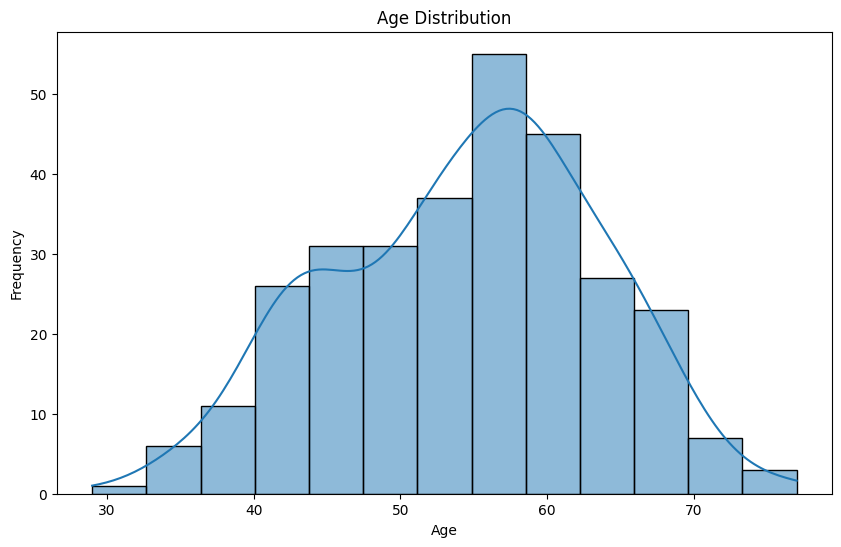

In [20]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

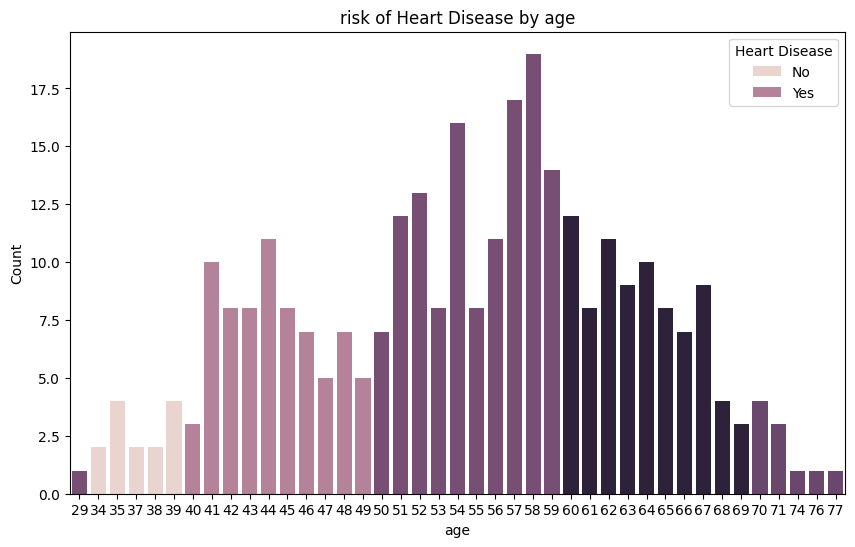

In [21]:
# Risk of Heart diseases by age
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='avg_chol_by_age_group', data= df)
plt.title('risk of Heart Disease by age')
plt.xlabel('age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

<Figure size 1200x800 with 0 Axes>

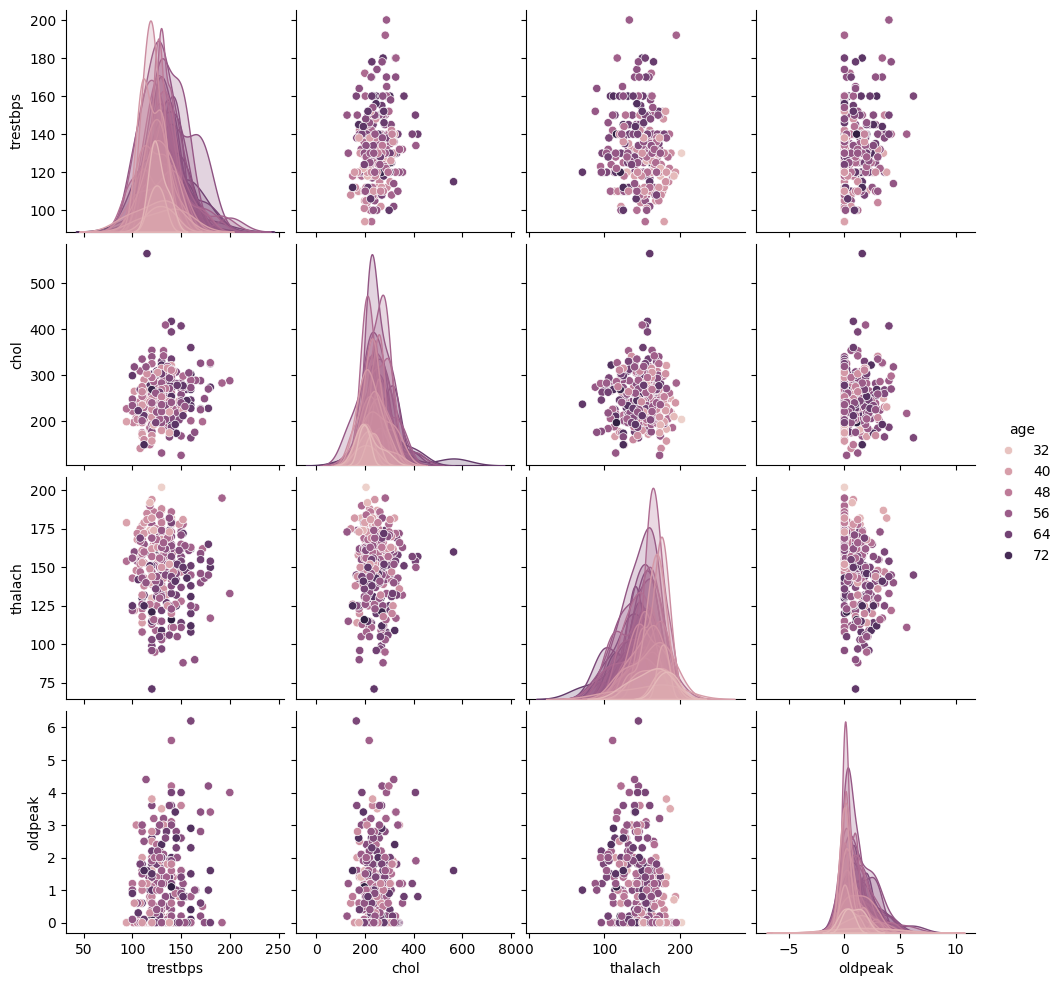

In [23]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='age', vars=[ 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.show()

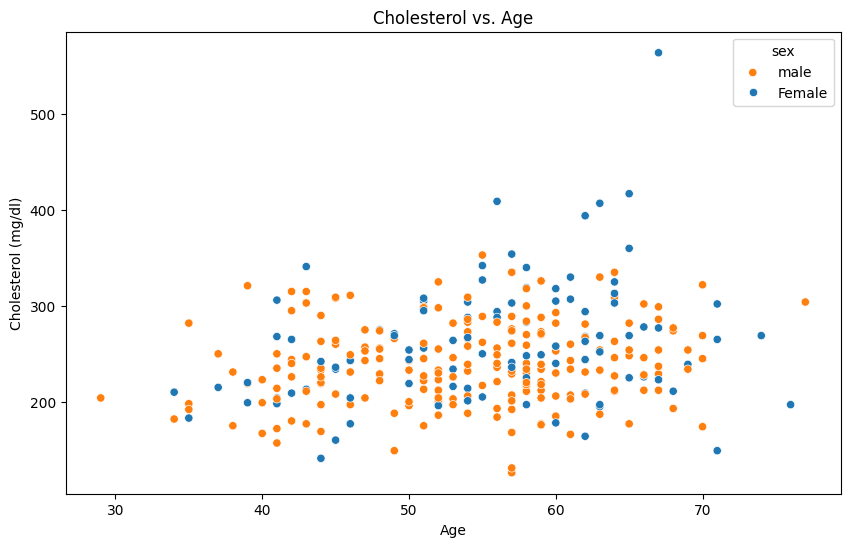

In [24]:
# Scatter Plot of Cholesterol (chol) vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='sex', data=df)
plt.title('Cholesterol vs. Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.legend(title='sex', labels=['male', 'Female'])
plt.show()

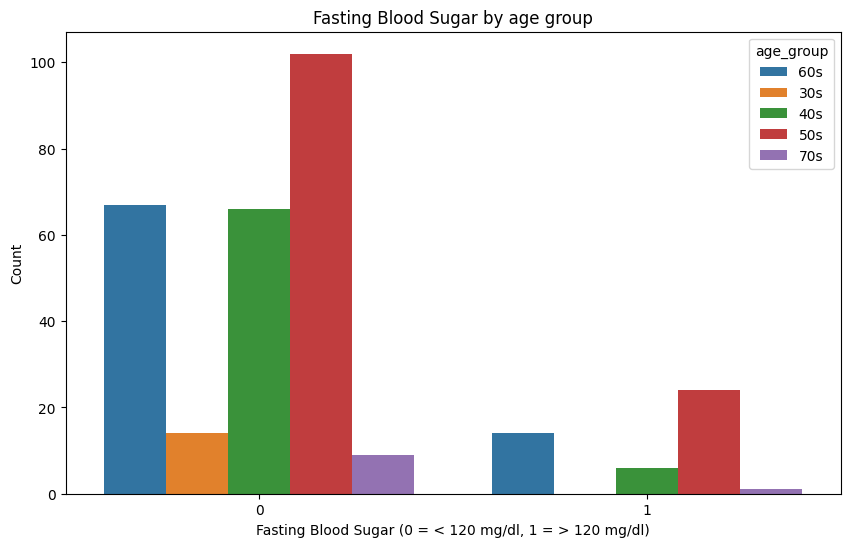

In [25]:
# Bar Plot of Fasting Blood Sugar (fbs) by Age group
plt.figure(figsize=(10, 6))
sns.countplot(x='fbs', hue='age_group', data=df)
plt.title('Fasting Blood Sugar by age group')
plt.xlabel('Fasting Blood Sugar (0 = < 120 mg/dl, 1 = > 120 mg/dl)')
plt.ylabel('Count')
plt.show()

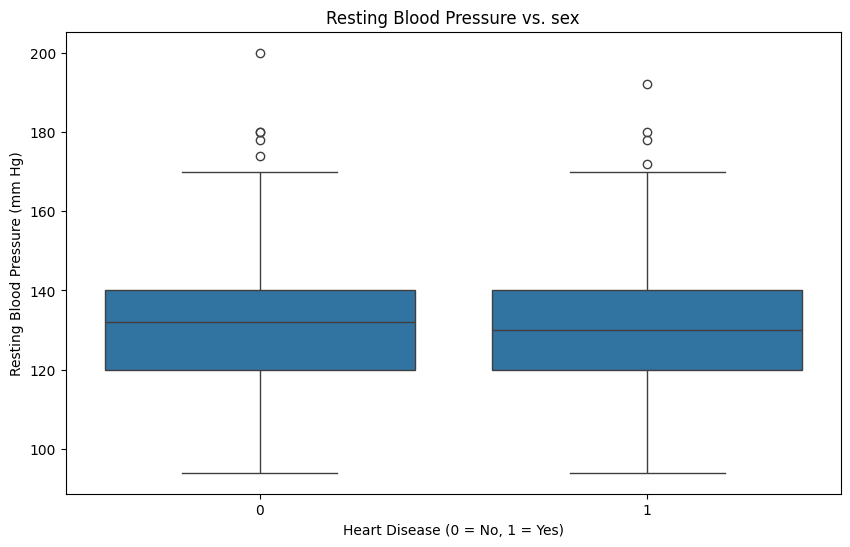

In [26]:
# Box Plot of Resting Blood Pressure (trestbps) vs. sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='trestbps', data=df)
plt.title('Resting Blood Pressure vs. sex')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()


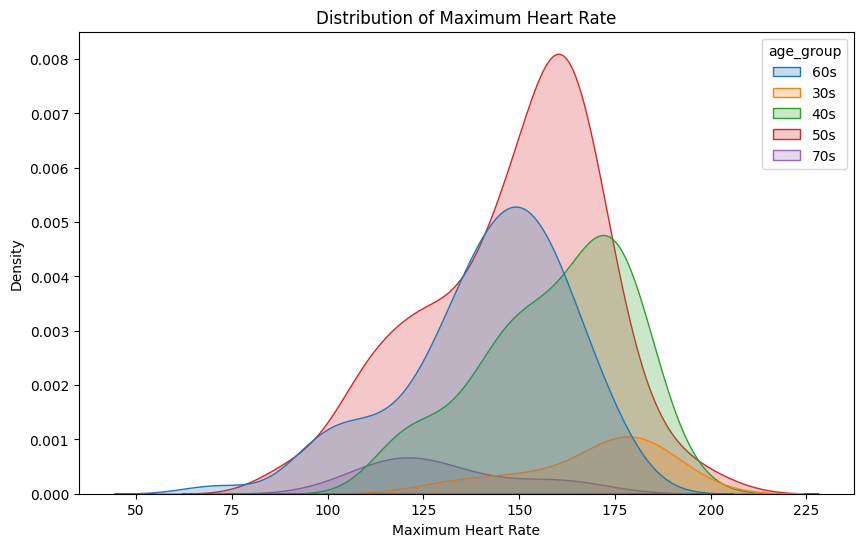

In [27]:
# KDE Plot of Maximum Heart Rate (thalach)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='thalach', hue='age_group', fill=True)
plt.title('Distribution of Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Density')
plt.show()